In [2]:
import os
import os.path as osp
import torch
from torch_geometric.datasets import Planetoid

In [3]:
name='cora'
root_path = '../'
path = osp.join(root_path, 'data', name)
dataset = Planetoid(path, name=name)
data = dataset[0]

In [4]:
print(type(data))

<class 'torch_geometric.data.data.Data'>


In [7]:
hl_path = osp.join('..\\data\\' + name + '\\HL_' + name + '_3.pt')
HL2 = torch.load(hl_path)
print(HL2)

{1: SparseTensor(row=tensor([   0,    0,    0,  ..., 2707, 2707, 2707]),
             col=tensor([   0,  633, 1862,  ..., 1473, 2706, 2707]),
             val=tensor([0.5000, 0.1667, 0.1443,  ..., 0.1250, 0.1250, 0.5000]),
             size=(2708, 2708), nnz=13264, density=0.18%), 2: SparseTensor(row=tensor([   0,    0,    0,  ..., 2707, 2707, 2707]),
             col=tensor([   0, 1862, 2582,  ..., 1473, 2706, 2707]),
             val=tensor([0.3333, 0.3333, 0.3333,  ..., 0.2000, 0.1721, 0.3333]),
             size=(2708, 2708), nnz=7158, density=0.10%)}


In [9]:
a = torch.tensor([[1,2,3],[7,0.0,1.2]])
print(a)

tensor([[1.0000, 2.0000, 3.0000],
        [7.0000, 0.0000, 1.2000]])


In [11]:
b = torch.ones(a.size())
print(b)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [20]:
z=[]
z.append(a)
z.append(b)
c=torch.stack(z, dim=0)
print(c)
print(c.size())
t = torch.ones(3,1)
print(t)

tensor([[[1.0000, 2.0000, 3.0000],
         [7.0000, 0.0000, 1.2000]],

        [[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]]])
torch.Size([2, 2, 3])
tensor([[1.],
        [1.],
        [1.]])


In [22]:
s=torch.einsum('bij,jk->ik', c,t )
print(s)

tensor([[ 9.0000],
        [11.2000]])


In [26]:
torch.mm(a,t)

tensor([[6.0000],
        [8.2000]])

In [33]:
print(a)
t=[a,a]

print(t)

tensor([[1.0000, 2.0000, 3.0000],
        [7.0000, 0.0000, 1.2000]])
[tensor([[1.0000, 2.0000, 3.0000],
        [7.0000, 0.0000, 1.2000]]), tensor([[1.0000, 2.0000, 3.0000],
        [7.0000, 0.0000, 1.2000]])]


In [37]:
for i in range(2,10,2):
    print(i)

2
4
6
8


In [41]:
a = torch.Tensor(1)
print(a)

tensor([0.])


In [26]:
import networkx as nx
from collections import Counter

def weisfeiler_lehman(graph, num_iterations=100):
    # Assign initial colors to nodes based on their degrees
    node_colors = {node: graph.degree(node) for node in graph.nodes}

    # Perform WL iterations
    for _ in range(num_iterations):
        new_colors = {}
        for node in graph.nodes:
            # Get the colors of the neighbors
            neighbor_colors = [node_colors[neighbor] for neighbor in graph.neighbors(node)]

            # Combine the current node color with sorted neighbor colors
            combined_colors = [node_colors[node]] + sorted(neighbor_colors)

            # Create a color string and hash it
            color_string = '_'.join(str(color) for color in combined_colors)
            new_colors[node] = hash(color_string)

        # Update the node colors
        node_colors = new_colors
        #print(node_colors)
    print(node_colors)
    return node_colors

{1: -1600003932409914981, 2: 8459395183220039833, 4: -6268908758547030116, 5: -2018854645855365795, 6: 9160304488943764732, 3: 3683494258503268398}


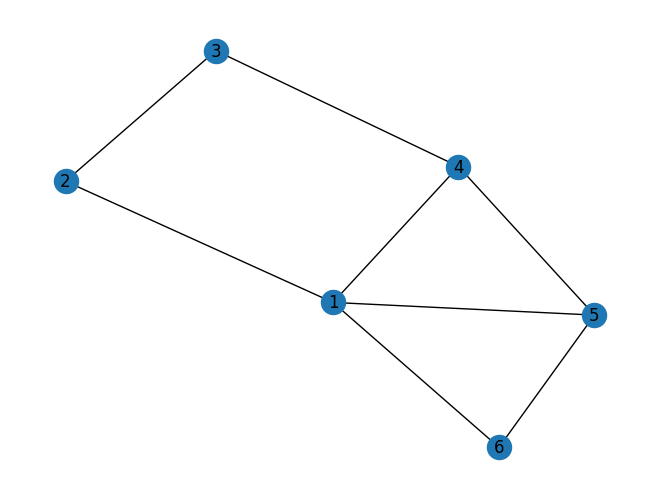

In [27]:

# Create a sample graph
G = nx.Graph()
edges = [(1,2),(1,4),(1,5),(1,6),(2,3),(3,4),(4,5),(5,6)]
G.add_edges_from(edges)
nx.draw(G,with_labels=True)

# Apply the Welsh-Powell algorithm
colors = weisfeiler_lehman(G)

{3: 4079612136336191393, 8: 4079612136336191393, 1: 4079612136336191393, 2: 4079612136336191393, 0: 4079612136336191393, 4: 4079612136336191393, 5: 4079612136336191393, 9: 4079612136336191393, 6: 4079612136336191393, 7: 4079612136336191393}


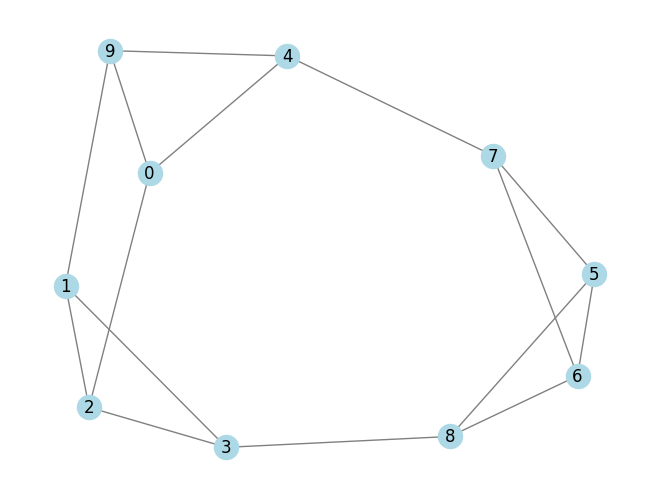

In [135]:
from matplotlib import pyplot as plt

#random_graph = nx.gnp_random_graph(7, 0.4)
random_graph = nx.random_graphs.random_regular_graph(3,10)  #生成包含10个节点、每个节点有2个邻居的规则图RG

# Apply the Welsh-Powell algorithm
colors = weisfeiler_lehman(random_graph,1000)
# Draw the graph
nx.draw(random_graph, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

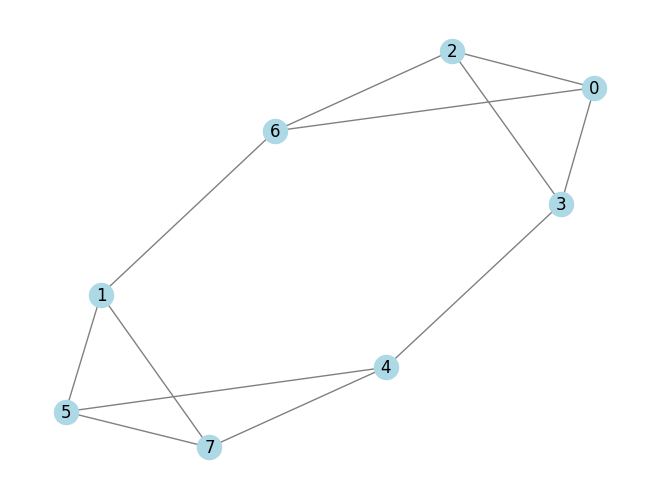

In [126]:
# Draw the graph
nx.draw(random_graph, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()